In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw_data.csv')

In [3]:
data.describe(include='all')

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
count,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000
unique,2000,1882,NaN,NaN,NaN,NaN,NaN,2
top,Allison Hill,North Joseph,NaN,NaN,NaN,NaN,NaN,False
freq,1,4,NaN,NaN,NaN,NaN,NaN,1121
mean,NaN,NaN,90585.977000,573.946000,25308.503000,20.441000,56.680000,NaN
std,NaN,NaN,34487.874907,160.564945,14207.320147,11.777813,18.638033,NaN
min,NaN,NaN,30053.000000,300.000000,1022.000000,0.000000,10.000000,NaN
25%,NaN,NaN,61296.250000,433.000000,12748.750000,10.000000,45.000000,NaN
50%,NaN,NaN,90387.500000,576.000000,25661.500000,21.000000,55.000000,NaN
75%,NaN,NaN,120099.750000,715.000000,37380.500000,31.000000,70.000000,NaN


<Axes: xlabel='income', ylabel='credit_score'>

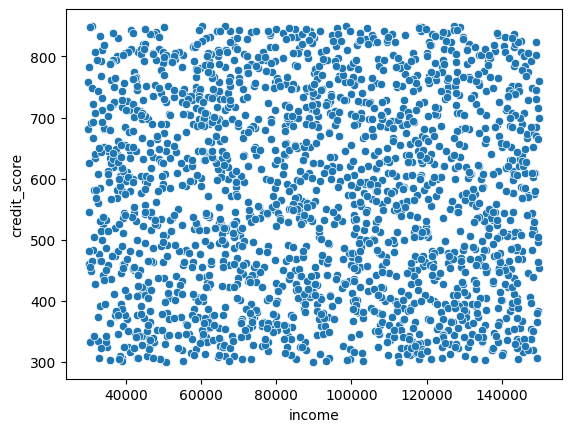

In [4]:
# Does the the income matters for determine the credit score?
sns.scatterplot(data=data, x='income', y='credit_score')

<Axes: xlabel='income', ylabel='years_employed'>

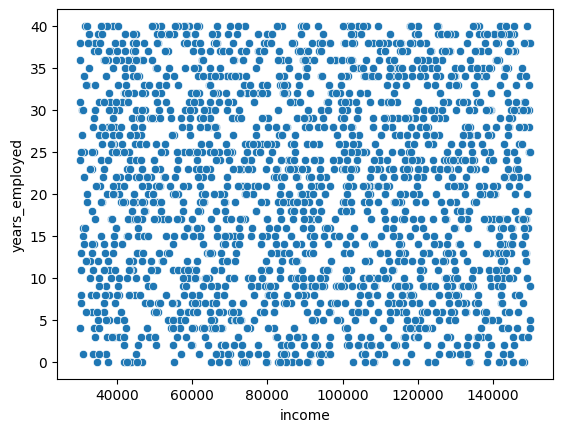

In [5]:
# Could be some relationship between income and the years employed?
sns.scatterplot(data=data, x='income', y='years_employed')

<Axes: xlabel='income', ylabel='loan_amount'>

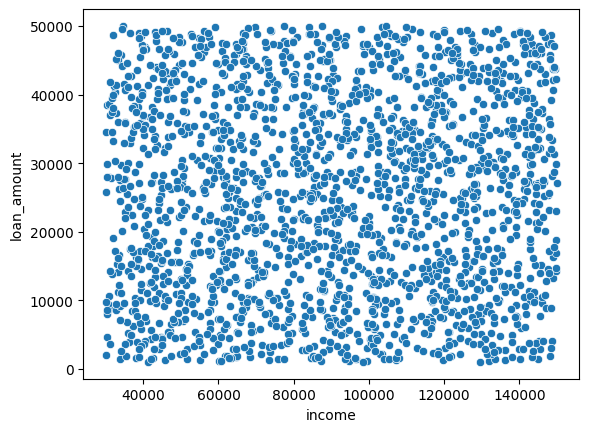

In [6]:
# What about the income and the loan amount for the loan approved?
sns.scatterplot(data=data, x='income', y='loan_amount')

<Axes: xlabel='credit_score', ylabel='Count'>

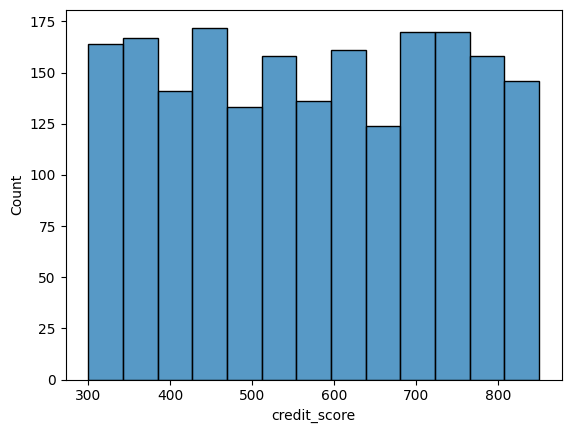

In [7]:
# Another way to see it is through the distribution of each variable:
sns.histplot(data['credit_score'])

<Axes: xlabel='loan_amount', ylabel='Count'>

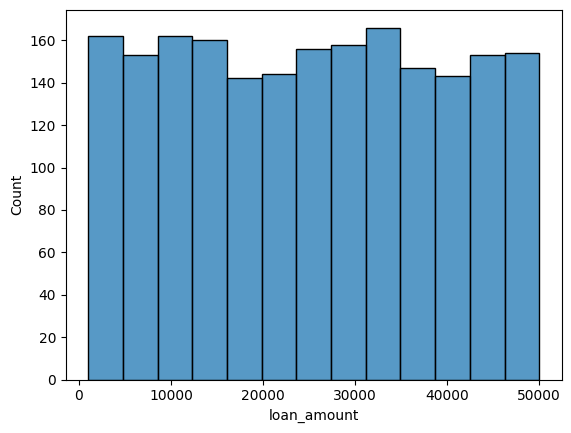

In [8]:
sns.histplot(data['loan_amount'])

<Axes: xlabel='years_employed', ylabel='Count'>

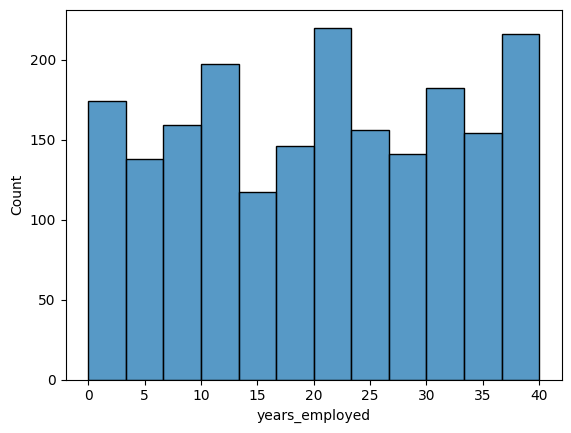

In [9]:
sns.histplot(data['years_employed'])

<Axes: xlabel='points', ylabel='Count'>

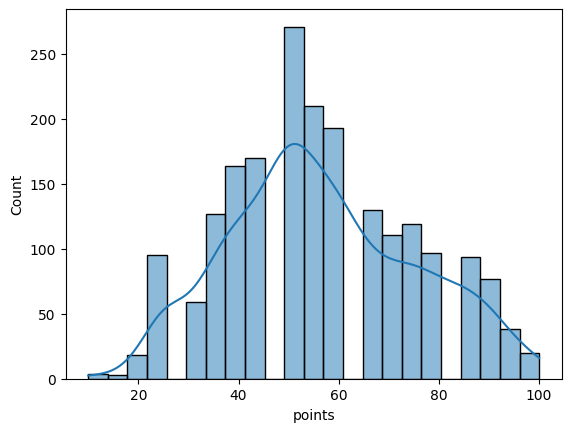

In [10]:
sns.histplot(data['points'], kde=True)

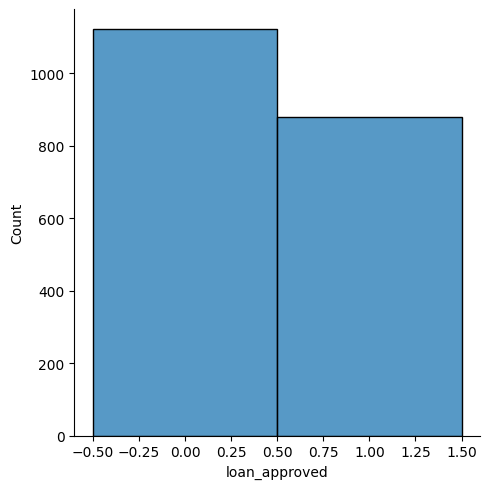

In [11]:
sns.displot(data['loan_approved'], discrete=True, bins=[0,1])

<Axes: >

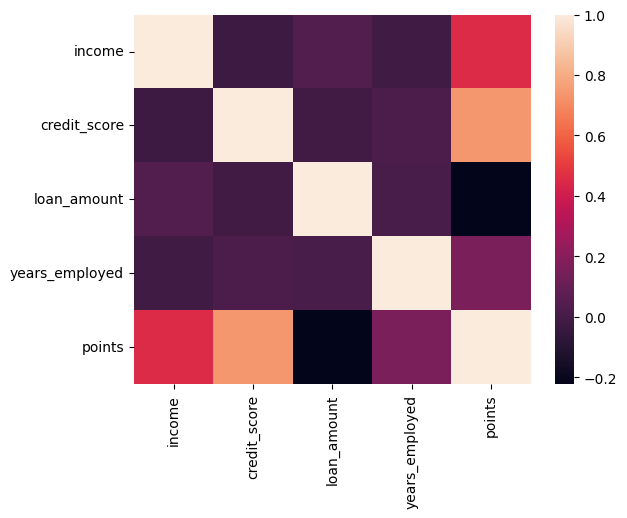

In [12]:
# 1. Remove categorical variables
sub_data = data.drop(columns=['name', 'city', 'loan_approved'])

# 2. Calculate the correlation between numerical variables
cor_matrix = sub_data.corr()

# 3. Plot the heatmap based on correlations
sns.heatmap(cor_matrix)

- Here we can see some correlation between 'credit score' and 'points' perhaps becuase they are measuring similar things on the root.
- Also we can see some correlation between 'points' and 'income' which make sense since as a rule of thumb if you earn more your profile will be better.

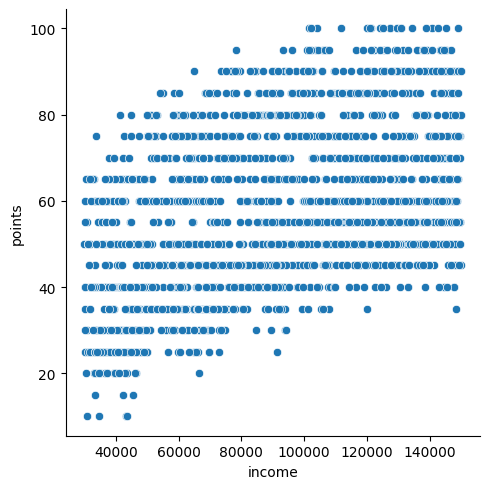

In [ ]:
# Note that, the highest points (100) are on the right hand side of the graphic, that mean, the higher salaries.
sns.relplot(data=data, x='income', y='points')

### Insights:
1. The target variable (loan_approved) is already balanced. (1121 FALSE over 2000)
1. There are not missing values on the predictor variables neither on the target variable. (The count of each variable is equal to 2000)
1. The min values of some variables (load_amount or points) could be rare BUT I think there are not too much fundamentals to drop them directly.
1. The variable 'city' could be useful but due the high cardinality maybe we can drop it directly later.